201810824 현소미

##답 1-1

In [3]:
import os
subwaydf  = spark\
        .read\
        .format('com.databricks.spark.csv')\
        .options(header='true', inferschema='true', delimiter=',')\
        .load(os.path.join('/FileStore/tables','CARD_SUBWAY_MONTH_202008_1_.csv'))

In [4]:
subwaydf.show()

+--------+------+-----------------------+-----+------------+------------+--------+
사용일자|노선명| 역ID| 역명|승차총승객수|하차총승객수|등록일자|
+--------+------+-----------------------+-----+------------+------------+--------+
20200801|중앙선| 오빈| 249| 239| 20200804| null|
20200801|중앙선| 아신| 467| 595| 20200804| null|
20200801|중앙선| 국수| 520| 598| 20200804| null|
20200801| 2호선| 한양대| 3244| 3022| 20200804| null|
20200801| 2호선| 왕십리(성동구청)|11110| 9769| 20200804| null|
20200801| 2호선| 상왕십리| 8110| 7289| 20200804| null|
20200801| 2호선| 신당| 8703| 8731| 20200804| null|
20200801| 2호선|동대문역사문화공원(DDP)| 8183| 8474| 20200804| null|
20200801| 2호선| 을지로4가| 5103| 5207| 20200804| null|
20200801| 2호선| 을지로3가| 7714| 7826| 20200804| null|
20200801| 2호선| 을지로입구|17597| 17387| 20200804| null|
20200801| 2호선| 시청| 5908| 5313| 20200804| null|
20200801| 1호선| 청량리(서울시립대입구)|15186| 15126| 20200804| null|
20200801| 1호선| 제기동|10652| 10614| 20200804| null|
20200801| 1호선| 신설동| 7507| 7209| 20200804| null|
20200801| 1호선| 동대문| 9290| 9591| 20200804| null|
20200801| 1호선| 종로5가|14190| 14490| 20200804| null|
20200801| 1호선| 종로3가|17935| 17664| 20200804| null|
20200801| 1호선| 종각|16751| 16845| 20200804| null|
20200801|안산선| 정왕| 4547| 4651| 20200804| null|
+--------+------+-----------------------+-----+------------+------------+--------+
only showing top 20 rows

##답 1-2

In [6]:
subwaydf=subwaydf.withColumnRenamed('사용일자','dateUse')
subwaydf=subwaydf.withColumnRenamed('노선명','line')
subwaydf=subwaydf.withColumnRenamed('역ID','stationID')
subwaydf=subwaydf.withColumnRenamed('역명','station')
subwaydf=subwaydf.withColumnRenamed('승차총승객수','NInPassengers')
subwaydf=subwaydf.withColumnRenamed('하차총승객수','NOutPassengers')
subwaydf=subwaydf.withColumnRenamed('등록일자','dateRegi')

In [7]:
subwaydf.printSchema()

root
-- dateUse: integer (nullable = true)
-- line: string (nullable = true)
-- stationID: string (nullable = true)
-- station: integer (nullable = true)
-- NInPassengers: integer (nullable = true)
-- NOutPassengers: integer (nullable = true)
-- dateRegi: string (nullable = true)

In [8]:
from pyspark.sql import functions as F
subwaydf=subwaydf.withColumn('SumInOut',subwaydf.NInPassengers+subwaydf.NOutPassengers)

In [9]:
subwaydf.groupBy(subwaydf['line']).agg({"SumInOut":"max"}).show(50)

+--------------+-------------+
 line|max(SumInOut)|
+--------------+-------------+
 일산선| 20218726|
 장항선| 20205351|
 경부선| 20247792|
 우이신설선| 20206015|
 분당선| 20228404|
 7호선| 20247651|
 수인선| 20206576|
 안산선| 20218707|
 4호선| 20235924|
 1호선| 20249916|
 경의선| 20210445|
 3호선| 20258659|
 경강선| 20207377|
 경춘선| 20206598|
 9호선| 20239592|
 6호선| 20220294|
 5호선| 20240610|
 8호선| 20223338|
 과천선| 20227528|
 경인선| 20236356|
 중앙선| 20224284|
 9호선2~3단계| 20220252|
 2호선| 20304853|
공항철도 1호선| 20214124|
 경원선| 20220835|
+--------------+-------------+

In [10]:
list=subwaydf.groupBy(subwaydf['line']).agg({"SumInOut":"max"})

In [11]:
list=list.withColumnRenamed('max(SumInOut)','m')

In [12]:
joinDf=list.join(subwaydf, list.m==subwaydf.SumInOut, "inner")

##답 1-3

In [14]:
joinDf.show(50)

+--------------+--------+--------+--------------+--------------------+-------+-------------+--------------+--------+--------+
 line| m| dateUse| line| stationID|station|NInPassengers|NOutPassengers|dateRegi|SumInOut|
+--------------+--------+--------+--------------+--------------------+-------+-------------+--------------+--------+--------+
 장항선|20205351|20200801| 경원선| 광운대| 4801| 4547| 20200804| null|20205351|
 안산선|20218707|20200807| 안산선| 산본| 16478| 17897| 20200810| null|20218707|
 과천선|20227528|20200807| 과천선| 범계| 26478| 26718| 20200810| null|20227528|
 경춘선|20206598|20200807| 경춘선| 평내호평| 5904| 5788| 20200810| null|20206598|
 경원선|20220835|20200807| 경원선| 의정부| 18455| 20025| 20200810| null|20220835|
 경부선|20247792|20200807| 경부선| 영등포| 43168| 46982| 20200810| null|20247792|
 9호선|20239592|20200807| 9호선| 신논현| 35701| 38782| 20200810| null|20239592|
 6호선|20220294|20200807| 6호선| 공덕| 19817| 19484| 20200810| null|20220294|
 중앙선|20224284|20200807| 중앙선| 회기| 24548| 23474| 20200810| null|20224284|
 일산선|20218726|20200807| 일산선| 화정| 17591| 17916| 20200810| null|20218726|
 2호선|20304853|20200807| 2호선| 강남| 98692| 104043| 20200810| null|20304853|
 장항선|20205351|20200809| 5호선| 신정(은행정)| 4982| 4539| 20200812| null|20205351|
 8호선|20223338|20200810| 8호선| 문정| 21546| 22525| 20200813| null|20223338|
공항철도 1호선|20214124|20200811|공항철도 1호선| 디지털미디어시티| 14311| 13310| 20200814| null|20214124|
 4호선|20235924|20200812| 4호선| 혜화| 34232| 35109| 20200815| null|20235924|
 경원선|20220835|20200812| 3호선| 구파발| 21389| 20020| 20200815| null|20220835|
 우이신설선|20206015|20200812| 우이신설선| 북한산보국문| 5432| 5200| 20200815| null|20206015|
 수인선|20206576|20200812| 수인선| 인천논현| 5428| 5761| 20200815| null|20206576|
 장항선|20205351|20200812| 분당선| 신갈| 4699| 4536| 20200815| null|20205351|
 7호선|20247651|20200812| 7호선| 가산디지털단지| 46117| 46836| 20200815| null|20247651|
공항철도 1호선|20214124|20200812| 6호선| 합정| 13368| 13309| 20200815| null|20214124|
 경강선|20207377|20200813| 경강선| 경기광주| 7042| 6561| 20200816| null|20207377|
 경의선|20210445|20200813| 경의선| 일산| 9812| 9629| 20200816| null|20210445|
 1호선|20249916|20200814| 1호선| 서울역| 46822| 49099| 20200817| null|20249916|
 3호선|20258659|20200814| 3호선| 고속터미널| 49312| 57842| 20200817| null|20258659|
 9호선2~3단계|20220252|20200814| 9호선2~3단계| 봉은사| 19184| 19435| 20200817| null|20220252|
 경인선|20236356|20200814| 경인선| 부평| 31226| 35539| 20200817| null|20236356|
 분당선|20228404|20200814| 분당선| 야탑| 25876| 27587| 20200817| null|20228404|
 장항선|20205351|20200814| 장항선| 온양온천| 4528| 4534| 20200817| null|20205351|
 5호선|20240610|20200815| 5호선|광화문(세종문화회관)| 39181| 39792| 20200818| null|20240610|
 안산선|20218707|20200822| 4호선| 수유(강북구청)| 18256| 17882| 20200825| null|20218707|
 수인선|20206576|20200825| 일산선| 정발산| 5629| 5748| 20200828| null|20206576|
 수인선|20206576|20200827| 7호선| 태릉입구| 6188| 5746| 20200830| null|20206576|
 장항선|20205351|20200829| 9호선| 등촌| 4599| 4450| 20200901| null|20205351|
+--------------+--------+--------+--------------+--------------------+-------+-------------+--------------+--------+--------+

In [15]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
subwaydf = subwaydf.withColumn('date', subwaydf['dateUse'].cast(StringType()))
#subwaydf = subwaydf.withColumn('date', subwaydf['dateUse'].cast(DateType()))

In [16]:
from pyspark.sql.functions import to_date

subwaydf=subwaydf.withColumn('date2', to_date(subwaydf['date'], 'yyyyMMdd'))

In [17]:
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
subwaydf.show()

+--------+------+-----------------------+-------+-------------+--------------+--------+--------+--------+----------+
 dateUse| line| stationID|station|NInPassengers|NOutPassengers|dateRegi|SumInOut| date| date2|
+--------+------+-----------------------+-------+-------------+--------------+--------+--------+--------+----------+
20200801|중앙선| 오빈| 249| 239| 20200804| null|20201043|20200801|2020-08-01|
20200801|중앙선| 아신| 467| 595| 20200804| null|20201399|20200801|2020-08-01|
20200801|중앙선| 국수| 520| 598| 20200804| null|20201402|20200801|2020-08-01|
20200801| 2호선| 한양대| 3244| 3022| 20200804| null|20203826|20200801|2020-08-01|
20200801| 2호선| 왕십리(성동구청)| 11110| 9769| 20200804| null|20210573|20200801|2020-08-01|
20200801| 2호선| 상왕십리| 8110| 7289| 20200804| null|20208093|20200801|2020-08-01|
20200801| 2호선| 신당| 8703| 8731| 20200804| null|20209535|20200801|2020-08-01|
20200801| 2호선|동대문역사문화공원(DDP)| 8183| 8474| 20200804| null|20209278|20200801|2020-08-01|
20200801| 2호선| 을지로4가| 5103| 5207| 20200804| null|20206011|20200801|2020-08-01|
20200801| 2호선| 을지로3가| 7714| 7826| 20200804| null|20208630|20200801|2020-08-01|
20200801| 2호선| 을지로입구| 17597| 17387| 20200804| null|20218191|20200801|2020-08-01|
20200801| 2호선| 시청| 5908| 5313| 20200804| null|20206117|20200801|2020-08-01|
20200801| 1호선| 청량리(서울시립대입구)| 15186| 15126| 20200804| null|20215930|20200801|2020-08-01|
20200801| 1호선| 제기동| 10652| 10614| 20200804| null|20211418|20200801|2020-08-01|
20200801| 1호선| 신설동| 7507| 7209| 20200804| null|20208013|20200801|2020-08-01|
20200801| 1호선| 동대문| 9290| 9591| 20200804| null|20210395|20200801|2020-08-01|
20200801| 1호선| 종로5가| 14190| 14490| 20200804| null|20215294|20200801|2020-08-01|
20200801| 1호선| 종로3가| 17935| 17664| 20200804| null|20218468|20200801|2020-08-01|
20200801| 1호선| 종각| 16751| 16845| 20200804| null|20217649|20200801|2020-08-01|
20200801|안산선| 정왕| 4547| 4651| 20200804| null|20205455|20200801|2020-08-01|
+--------+------+-----------------------+-------+-------------+--------------+--------+--------+--------+----------+
only showing top 20 rows

In [18]:
subwaydf = (subwaydf
    .withColumn("dayofweek", dayofweek("date2")))
subwaydf.show(10000)

+--------+--------------+-----------------------------+-------+-------------+--------------+--------+--------+--------+----------+---------+
 dateUse| line| stationID|station|NInPassengers|NOutPassengers|dateRegi|SumInOut| date| date2|dayofweek|
+--------+--------------+-----------------------------+-------+-------------+--------------+--------+--------+--------+----------+---------+
20200801| 중앙선| 오빈| 249| 239| 20200804| null|20201043|20200801|2020-08-01| 7|
20200801| 중앙선| 아신| 467| 595| 20200804| null|20201399|20200801|2020-08-01| 7|
20200801| 중앙선| 국수| 520| 598| 20200804| null|20201402|20200801|2020-08-01| 7|
20200801| 2호선| 한양대| 3244| 3022| 20200804| null|20203826|20200801|2020-08-01| 7|
20200801| 2호선| 왕십리(성동구청)| 11110| 9769| 20200804| null|20210573|20200801|2020-08-01| 7|
20200801| 2호선| 상왕십리| 8110| 7289| 20200804| null|20208093|20200801|2020-08-01| 7|
20200801| 2호선| 신당| 8703| 8731| 20200804| null|20209535|20200801|2020-08-01| 7|
20200801| 2호선| 동대문역사문화공원(DDP)| 8183| 8474| 20200804| null|20209278|20200801|2020-08-01| 7|
20200801| 2호선| 을지로4가| 5103| 5207| 20200804| null|20206011|20200801|2020-08-01| 7|
20200801| 2호선| 을지로3가| 7714| 7826| 20200804| null|20208630|20200801|2020-08-01| 7|
20200801| 2호선| 을지로입구| 17597| 17387| 20200804| null|20218191|20200801|2020-08-01| 7|
20200801| 2호선| 시청| 5908| 5313| 20200804| null|20206117|20200801|2020-08-01| 7|
20200801| 1호선| 청량리(서울시립대입구)| 15186| 15126| 20200804| null|20215930|20200801|2020-08-01| 7|
20200801| 1호선| 제기동| 10652| 10614| 20200804| null|20211418|20200801|2020-08-01| 7|
20200801| 1호선| 신설동| 7507| 7209| 20200804| null|20208013|20200801|2020-08-01| 7|
20200801| 1호선| 동대문| 9290| 9591| 20200804| null|20210395|20200801|2020-08-01| 7|
20200801| 1호선| 종로5가| 14190| 14490| 20200804| null|20215294|20200801|2020-08-01| 7|
20200801| 1호선| 종로3가| 17935| 17664| 20200804| null|20218468|20200801|2020-08-01| 7|
20200801| 1호선| 종각| 16751| 16845| 20200804| null|20217649|20200801|2020-08-01| 7|
20200801| 안산선| 정왕| 4547| 4651| 20200804| null|20205455|20200801|2020-08-01| 7|
20200801| 안산선| 신길온천| 1057| 998| 20200804| null|20201802|20200801|2020-08-01| 7|
20200801| 우이신설선| 삼양사거리| 1500| 1448| 20200804| null|20202252|20200801|2020-08-01| 7|
20200801| 우이신설선| 삼양| 1123| 1217| 20200804| null|20202021|20200801|2020-08-01| 7|
20200801| 우이신설선| 화계| 1855| 1745| 20200804| null|20202549|20200801|2020-08-01| 7|
20200801| 우이신설선| 가오리| 2364| 2122| 20200804| null|20202926|20200801|2020-08-01| 7|
20200801| 우이신설선| 4.19민주묘지| 1673| 1524| 20200804| null|20202328|20200801|2020-08-01| 7|
20200801| 우이신설선| 솔밭공원| 1334| 1246| 20200804| null|20202050|20200801|2020-08-01| 7|
20200801| 우이신설선| 북한산우이| 1944| 2220| 20200804| null|20203024|20200801|2020-08-01| 7|
20200801| 안산선| 수리산| 2354| 2004| 20200804| null|20202808|20200801|2020-08-01| 7|
20200801| 안산선| 오이도| 6133| 6299| 20200804| null|20207103|20200801|2020-08-01| 7|
20200801| 안산선| 안산| 9538| 10146| 20200804| null|20210950|20200801|2020-08-01| 7|
20200801| 안산선| 초지| 2299| 2280| 20200804| null|20203084|20200801|2020-08-01| 7|
20200801| 안산선| 고잔| 4294| 4036| 20200804| null|20204840|20200801|2020-08-01| 7|
20200801| 안산선| 중앙| 11123| 12253| 20200804| null|20213057|20200801|2020-08-01| 7|
20200801| 안산선| 한대앞| 4706| 4543| 20200804| null|20205347|20200801|2020-08-01| 7|
20200801| 안산선| 상록수| 11637| 11069| 20200804| null|20211873|20200801|2020-08-01| 7|
20200801| 안산선| 반월| 2983| 2729| 20200804| null|20203533|20200801|2020-08-01| 7|
20200801| 안산선| 대야미| 3304| 2806| 20200804| null|20203610|20200801|2020-08-01| 7|
20200801| 안산선| 산본| 10392| 10909| 20200804| null|20211713|20200801|2020-08-01| 7|
20200801| 수인선| 인천| 732| 1182| 20200804| null|20201986|20200801|2020-08-01| 7|
20200801| 수인선| 신포| 971| 1082| 20200804| null|20201886|20200801|2020-08-01| 7|
20200801| 수인선| 숭의| 1982| 1740| 20200804| null|20202544|20200801|2020-08-01| 7|
20200801| 수인선| 인하대| 2734| 2543| 20200804| null|20203347|20200801|2020-08-01| 7|
20200801| 수인선| 송도| 1465| 1421| 20200804| null|20202225|20200801|2020-08-01| 7|
20200801| 수인선| 연수| 2794| 2975| 20200804| 

In [19]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
def classifyday(s):
    q=""
    if s==1:
        q="Sunday"
    elif s==2:
        q="Monday"
    elif s==3:
        q="Tuesday"
    elif s==4:
        q="Wednesday"  
    elif s==5:
        q="Thursday"
    elif s==6:
        q="Friday"
    else:
        q="Saturday"
    return q

In [20]:
DAY_udf = udf(classifyday, StringType())

In [21]:
subwaydf=subwaydf.withColumn("DAY", DAY_udf(subwaydf.dayofweek))

##답 1-4

In [23]:
subwaydf.groupBy('line').pivot('DAY').agg({"SumInOut":"sum"}).show()

+----------+----------+----------+----------+----------+----------+----------+----------+
 line| Friday| Monday| Saturday| Sunday| Thursday| Tuesday| Wednesday|
+----------+----------+----------+----------+----------+----------+----------+----------+
 일산선| 808395124|1010437381|1010319451|1010235636| 808383940| 808393127| 808392796|
 장항선| 484860929| 606069487| 606063946| 606058420| 484854907| 484857571| 484857468|
 경부선|3152874143|3940824196|3940449561|3940133615|3152768029|3152789327|3152794978|
우이신설선|1050583774|1313216004|1313167396|1313141053|1050582715|1050586483|1050587942|
 분당선|2809238836|3435543817|3455281248|3434771069|2788970586|2789009658|2768803828|
 7호선|4123433410|5153934706|5152897879|5152372864|4123394044|4123436711|4123433745|
 수인선|1050588760|1313214661|1313171127|1313138823|1050582601|1050584965|1050586007|
 안산선|1050846248|1313503526|1313393601|1313300973|1050826620|1050840359|1050838751|
 4호선|2102629179|2627972877|2627425802|2627003684|2102581482|2102588996|2102590630|
 1호선| 808840770|1010902468|1010677910|1010442174| 808804370| 808813210| 808797690|
 경의선|2141642803|2646697558|2646561932|2646494734|2121429983|2121436128|2121433286|
 3호선|2708784505|3415913093|3354722587|3374445602|2688499281|2708723859|2708711680|
 경강선| 888930088|1090945973|1111121523|1111105700| 888923196| 868723718| 888926255|
 경춘선|1535387760|1919221212|1919196396|1919167433|1535380993|1535382747|1535383086|
 9호선|2021107122|2526177609|2525784137|2525583827|2021068190|2021074069|2021062632|
 6호선|3031250674|3798984557|3798594037|3818552063|3091829677|3031240634|3031242266|
 5호선|4244326342|5315167094|5314273162|5313799053|4244300204|4244334032|4244325671|
 8호선|1374322875|1717805968|1717544282|1717409954|1374304672|1374321055|1374320670|
 과천선| 646761679| 808392943| 808256281| 808185423| 646752103| 646758203| 646760792|
 경인선|1617072711|2021192027|2020923212|2020665884|1617026950|1617048535|1617052844|
+----------+----------+----------+----------+----------+----------+----------+----------+
only showing top 20 rows

In [24]:
sum=subwaydf.groupBy('line').pivot('DAY').agg({"SumInOut":"sum"})
pdf=sum.toPandas()
pdf.head()

,line,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,일산선,808395124,1010437381,1010319451,1010235636,808383940,808393127,808392796
1,장항선,484860929,606069487,606063946,606058420,484854907,484857571,484857468
2,경부선,3152874143,3940824196,3940449561,3940133615,3152768029,3152789327,3152794978
3,우이신설선,1050583774,1313216004,1313167396,1313141053,1050582715,1050586483,1050587942
4,분당선,2809238836,3435543817,3455281248,3434771069,2788970586,2789009658,2768803828


In [25]:
my=pdf.drop('line', 1).transpose()

##답 1-5

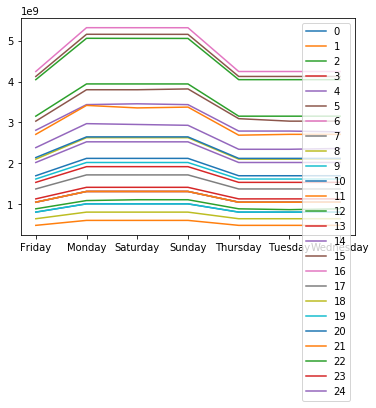

In [27]:
my.plot(kind='line')

##답 2-1

In [29]:
import os
timedf  = spark\
        .read\
        .format('com.databricks.spark.csv')\
        .options(header='true', inferschema='true', delimiter=',')\
        .load(os.path.join('/FileStore/tables','TimeProvince.csv'))

In [30]:
timedf.printSchema()

root
-- date: string (nullable = true)
-- time: integer (nullable = true)
-- province: string (nullable = true)
-- confirmed: integer (nullable = true)
-- released: integer (nullable = true)
-- deceased: integer (nullable = true)

In [31]:
timedf.show()

+----------+----+-----------------+---------+--------+--------+
 date|time| province|confirmed|released|deceased|
+----------+----+-----------------+---------+--------+--------+
2020-01-20| 16| Seoul| 0| 0| 0|
2020-01-20| 16| Busan| 0| 0| 0|
2020-01-20| 16| Daegu| 0| 0| 0|
2020-01-20| 16| Incheon| 1| 0| 0|
2020-01-20| 16| Gwangju| 0| 0| 0|
2020-01-20| 16| Daejeon| 0| 0| 0|
2020-01-20| 16| Ulsan| 0| 0| 0|
2020-01-20| 16| Sejong| 0| 0| 0|
2020-01-20| 16| Gyeonggi-do| 0| 0| 0|
2020-01-20| 16| Gangwon-do| 0| 0| 0|
2020-01-20| 16|Chungcheongbuk-do| 0| 0| 0|
2020-01-20| 16|Chungcheongnam-do| 0| 0| 0|
2020-01-20| 16| Jeollabuk-do| 0| 0| 0|
2020-01-20| 16| Jeollanam-do| 0| 0| 0|
2020-01-20| 16| Gyeongsangbuk-do| 0| 0| 0|
2020-01-20| 16| Gyeongsangnam-do| 0| 0| 0|
2020-01-20| 16| Jeju-do| 0| 0| 0|
2020-01-21| 16| Seoul| 0| 0| 0|
2020-01-21| 16| Busan| 0| 0| 0|
2020-01-21| 16| Daegu| 0| 0| 0|
+----------+----+-----------------+---------+--------+--------+
only showing top 20 rows

##답 2-2

In [33]:
timedf.where(timedf.date.substr(6, 2)=='03').show()

+----------+----+-----------------+---------+--------+--------+
 date|time| province|confirmed|released|deceased|
+----------+----+-----------------+---------+--------+--------+
2020-03-01| 16| Seoul| 87| 11| 0|
2020-03-01| 16| Busan| 83| 0| 0|
2020-03-01| 16| Daegu| 2704| 6| 11|
2020-03-01| 16| Incheon| 6| 1| 0|
2020-03-01| 16| Gwangju| 9| 2| 0|
2020-03-01| 16| Daejeon| 13| 0| 0|
2020-03-01| 16| Ulsan| 20| 0| 0|
2020-03-01| 16| Sejong| 1| 0| 0|
2020-03-01| 16| Gyeonggi-do| 89| 8| 1|
2020-03-01| 16| Gangwon-do| 15| 0| 0|
2020-03-01| 16|Chungcheongbuk-do| 11| 0| 0|
2020-03-01| 16|Chungcheongnam-do| 68| 0| 0|
2020-03-01| 16| Jeollabuk-do| 6| 1| 0|
2020-03-01| 16| Jeollanam-do| 3| 0| 0|
2020-03-01| 16| Gyeongsangbuk-do| 556| 1| 6|
2020-03-01| 16| Gyeongsangnam-do| 63| 1| 0|
2020-03-01| 16| Jeju-do| 2| 0| 0|
2020-03-02| 0| Seoul| 91| 12| 0|
2020-03-02| 0| Busan| 88| 1| 0|
2020-03-02| 0| Daegu| 3081| 7| 15|
+----------+----+-----------------+---------+--------+--------+
only showing top 20 rows

In [34]:
timedf=timedf.withColumn('year',timedf.date.substr(1, 4))

In [35]:
timedf=timedf.withColumn('month',timedf.date.substr(6, 2))

##답 2-3

In [37]:
timedf.groupBy('year').pivot('month').count().show()

+----+---+---+---+---+---+---+
year| 01| 02| 03| 04| 05| 06|
+----+---+---+---+---+---+---+
2020|204|493|527|510|527|510|
+----+---+---+---+---+---+---+

##답 2-4

In [39]:
timedf.where(timedf['confirmed']>0).groupby('province').agg({'date':'min'}).show(50)

+-----------------+----------+
 province| min(date)|
+-----------------+----------+
 Busan|2020-02-20|
Chungcheongbuk-do|2020-02-21|
Chungcheongnam-do|2020-02-21|
 Daegu|2020-02-18|
 Daejeon|2020-02-22|
 Gangwon-do|2020-02-22|
 Gwangju|2020-02-04|
 Gyeonggi-do|2020-01-24|
 Gyeongsangbuk-do|2020-02-19|
 Gyeongsangnam-do|2020-02-19|
 Incheon|2020-01-20|
 Jeju-do|2020-02-21|
 Jeollabuk-do|2020-01-31|
 Jeollanam-do|2020-02-22|
 Sejong|2020-02-22|
 Seoul|2020-01-27|
 Ulsan|2020-02-22|
+-----------------+----------+

In [40]:
list1=timedf.where(timedf['confirmed']>0).groupby('province').agg({'date':'min'})

In [41]:
list1 = list2.withColumn("Date", list1['Date'].cast("string"))
list1 = list2.withColumn("Province", list1['Province'].cast("string"))

--------------------------------------------------------------------------- 
 AnalysisException Traceback (most recent call last)
 <command-2087948407415222> in <module> 
 ----> 1 list1 = list2 . withColumn ( "Date" , list1 [ 'Date' ] . cast ( "string" ) ) 
 2 list1 = list2 . withColumn ( "Province" , list1 [ 'Province' ] . cast ( "string" ) ) 

 /databricks/spark/python/pyspark/sql/dataframe.py in withColumn (self, colName, col) 
 2112 """
 2113 assert isinstance ( col , Column ) , "col should be Column" 
 -> 2114 return DataFrame ( self . _jdf . withColumn ( colName , col . _jc ) , self . sql_ctx ) 
 2115 
 2116 @ ignore_unicode_prefix

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1303 answer = self . gateway_client . send_command ( command ) 
 1304 return_value = get_return_value(
 -> 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 
 1307 for temp_arg in temp_args : 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 131 # Hide where the exception came from that shows a non-Pythonic 
 132 # JVM exception message. 
 --> 133 raise_from ( converted ) 
 134 else : 
 135 raise 

 /databricks/spark/python/pyspark/sql/utils.py in raise_from (e) 

 AnalysisException : Resolved attribute(s) Date#32692 missing from province#32130,min(date)#32670 in operator !Project [province#32130, min(date)#32670, cast(Date#32692 as string) AS Date#32699].;;
!Project [province#32130, min(date)#32670, cast(Date#32692 as string) AS Date#32699]
+- Aggregate [province#32130], [province#32130, min(date#32128) AS min(date)#32670]
 +- Filter (confirmed#32131 > 0)
 +- Project [date#32128, time#32129, province#32130, confirmed#32131, released#32132, deceased#32133, year#32202, substring(date#32128, 6, 2) AS month#32210]
 +- Project [date#32128, time#32129, province#32130, confirmed#32131, released#32132, deceased#32133, substring(date#32128, 1, 4) AS year#32202]
 +- Relation[date#32128,time#32129,province#32130,confirmed#32131,released#32132,deceased#32133] csv

In [42]:
list1=timedf.where(timedf['confirmed']>0).groupby('province').agg({'date':'min'})

In [43]:
list1=list1.withColumnRenamed('min(date)','Da')
list1=list1.withColumnRenamed('province','Pr')

In [44]:
joinDf=list1.join(timedf, list1.Da==timedf.date, "inner")

In [45]:
joinDf.show()

+-----------+----------+----------+----+-----------------+---------+--------+--------+----+-----+
 Pr| Da| date|time| province|confirmed|released|deceased|year|month|
+-----------+----------+----------+----+-----------------+---------+--------+--------+----+-----+
 Incheon|2020-01-20|2020-01-20| 16| Seoul| 0| 0| 0|2020| 01|
 Incheon|2020-01-20|2020-01-20| 16| Busan| 0| 0| 0|2020| 01|
 Incheon|2020-01-20|2020-01-20| 16| Daegu| 0| 0| 0|2020| 01|
 Incheon|2020-01-20|2020-01-20| 16| Incheon| 1| 0| 0|2020| 01|
 Incheon|2020-01-20|2020-01-20| 16| Gwangju| 0| 0| 0|2020| 01|
 Incheon|2020-01-20|2020-01-20| 16| Daejeon| 0| 0| 0|2020| 01|
 Incheon|2020-01-20|2020-01-20| 16| Ulsan| 0| 0| 0|2020| 01|
 Incheon|2020-01-20|2020-01-20| 16| Sejong| 0| 0| 0|2020| 01|
 Incheon|2020-01-20|2020-01-20| 16| Gyeonggi-do| 0| 0| 0|2020| 01|
 Incheon|2020-01-20|2020-01-20| 16| Gangwon-do| 0| 0| 0|2020| 01|
 Incheon|2020-01-20|2020-01-20| 16|Chungcheongbuk-do| 0| 0| 0|2020| 01|
 Incheon|2020-01-20|2020-01-20| 16|Chungcheongnam-do| 0| 0| 0|2020| 01|
 Incheon|2020-01-20|2020-01-20| 16| Jeollabuk-do| 0| 0| 0|2020| 01|
 Incheon|2020-01-20|2020-01-20| 16| Jeollanam-do| 0| 0| 0|2020| 01|
 Incheon|2020-01-20|2020-01-20| 16| Gyeongsangbuk-do| 0| 0| 0|2020| 01|
 Incheon|2020-01-20|2020-01-20| 16| Gyeongsangnam-do| 0| 0| 0|2020| 01|
 Incheon|2020-01-20|2020-01-20| 16| Jeju-do| 0| 0| 0|2020| 01|
Gyeonggi-do|2020-01-24|2020-01-24| 16| Seoul| 0| 0| 0|2020| 01|
Gyeonggi-do|2020-01-24|2020-01-24| 16| Busan| 0| 0| 0|2020| 01|
Gyeonggi-do|2020-01-24|2020-01-24| 16| Daegu| 0| 0| 0|2020| 01|
+-----------+----------+----------+----+-----------------+---------+--------+--------+----+-----+
only showing top 20 rows

##답 2-5

In [47]:
timedf.groupby('province').agg({'confirmed':'sum'}).show()

+-----------------+--------------+
 province|sum(confirmed)|
+-----------------+--------------+
 Sejong| 5111|
 Ulsan| 5269|
Chungcheongbuk-do| 5801|
 Gangwon-do| 5908|
 Gwangju| 3359|
 Gyeongsangbuk-do| 161079|
 Daegu| 807506|
 Gyeongsangnam-do| 13860|
 Incheon| 16645|
 Jeju-do| 1449|
 Gyeonggi-do| 81059|
 Busan| 16341|
 Daejeon| 5217|
 Seoul| 81923|
Chungcheongnam-do| 16780|
 Jeollabuk-do| 2108|
 Jeollanam-do| 1763|
+-----------------+--------------+

##답 3-1

In [49]:
BodyDf = spark\
    .read\
    .options(header='false', inferschema='true', delimiter='\t')\
    .csv(os.path.join('/FileStore/tables', 'ds_spark_heightweight.txt'))
BodyDf.show()

+---+-----+------+
_c0| _c1| _c2|
+---+-----+------+
 1|65.78|112.99|
 2|71.52|136.49|
 3| 69.4|153.03|
 4|68.22|142.34|
 5|67.79| 144.3|
 6| 68.7| 123.3|
 7| 69.8|141.49|
 8|70.01|136.46|
 9| 67.9|112.37|
 10|66.78|120.67|
 11|66.49|127.45|
 12|67.62|114.14|
 13| 68.3|125.61|
 14|67.12|122.46|
 15|68.28|116.09|
 16|71.09| 140.0|
 17|66.46| 129.5|
 18|68.65|142.97|
 19|71.23| 137.9|
 20|67.13|124.04|
+---+-----+------+
only showing top 20 rows

In [50]:
from pyspark.sql.types import DateType
BodyDf=BodyDf.withColumnRenamed('_c0','id')
BodyDf=BodyDf.withColumnRenamed('_c1','weight')
BodyDf=BodyDf.withColumnRenamed('_c2','height')


In [51]:
BodyDf = BodyDf.withColumn("id", BodyDf.id.cast("string"))
BodyDf = BodyDf.withColumn("height", BodyDf['height'].cast("double"))
BodyDf = BodyDf.withColumn("weight", BodyDf['weight'].cast("double"))

In [52]:
BodyDf.printSchema()

root
-- id: string (nullable = true)
-- weight: double (nullable = true)
-- height: double (nullable = true)

In [53]:

from pyspark.sql import functions as F
BodyDf = BodyDf.withColumn("bmi", ((F.col('weight'))/(F.col('height')/100))/(F.col('height')/100))

##답 3-2

In [55]:
BodyDf.show()

+---+------+------+------------------+
 id|weight|height| bmi|
+---+------+------+------------------+
 1| 65.78|112.99| 51.52450781072923|
 2| 71.52|136.49|38.390682967727116|
 3| 69.4|153.03|29.635094329636857|
 4| 68.22|142.34|33.671137797596444|
 5| 67.79| 144.3| 32.55614482225709|
 6| 68.7| 123.3| 45.18877660760554|
 7| 69.8|141.49|34.866144799069374|
 8| 70.01|136.46|37.596666824836525|
 9| 67.9|112.37| 53.77358764760977|
 10| 66.78|120.67| 45.86145079904512|
 11| 66.49|127.45|40.933290095532044|
 12| 67.62|114.14| 51.90383289772084|
 13| 68.3|125.61|43.288473608554604|
 14| 67.12|122.46| 44.75725444277766|
 15| 68.28|116.09| 50.66451505225453|
 16| 71.09| 140.0| 36.27040816326531|
 17| 66.46| 129.5|39.629701405763186|
 18| 68.65|142.97| 33.58541408508864|
 19| 71.23| 137.9| 37.45712255888467|
 20| 67.13|124.04|43.630795570932825|
+---+------+------+------------------+
only showing top 20 rows

In [56]:
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType

BodyDf = BodyDf.withColumn('weightF', BodyDf['weight'].cast(FloatType()))
BodyDf = BodyDf.withColumn('heightF', BodyDf['height'].cast(FloatType()))
BodyDfstatsW = BodyDf.select(
    F.mean('weightF').alias('mean'),
    F.stddev('weightF').alias('std')
).collect()
BodyDfstatsH = BodyDf.select(
    F.mean('heightF').alias('mean'),
    F.stddev('heightF').alias('std')
).collect()

In [57]:
meanMark = BodyDfstatsW[0]['mean']
stdMark = BodyDfstatsW[0]['std']

In [58]:
meanMark1 = BodyDfstatsH[0]['mean']
stdMark1 = BodyDfstatsH[0]['std']

In [59]:
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType
zscoreUdf = F.udf(lambda x: (x-meanMark)/stdMark, FloatType())
zscoreUdf1 = F.udf(lambda x: (x-meanMark1)/stdMark1, FloatType())

In [60]:
BodyDf=BodyDf.withColumn("zscoreW", zscoreUdf(BodyDf['weightF']))

In [61]:
BodyDf=BodyDf.withColumn("zscoreH", zscoreUdf1(BodyDf['heightF']))

##답 3-3

In [63]:
BodyDf.show()

+---+------+------+------------------+-------+-------+-----------+------------+
 id|weight|height| bmi|weightF|heightF| zscoreW| zscoreH|
+---+------+------+------------------+-------+-------+-----------+------------+
 1| 65.78|112.99| 51.52450781072923| 65.78| 112.99| -1.2458475| -1.2298968|
 2| 71.52|136.49|38.390682967727116| 71.52| 136.49| 1.9011154| 0.59337974|
 3| 69.4|153.03|29.635094329636857| 69.4| 153.03| 0.7388248| 1.8766551|
 4| 68.22|142.34|33.671137797596444| 68.22| 142.34| 0.09188773| 1.0472584|
 5| 67.79| 144.3| 32.55614482225709| 67.79| 144.3|-0.14386062| 1.1993278|
 6| 68.7| 123.3| 45.18877660760554| 68.7| 123.3| 0.35504615| -0.42998254|
 7| 69.8|141.49|34.866144799069374| 69.8| 141.49| 0.95812625| 0.9813108|
 8| 70.01|136.46|37.596666824836525| 70.01| 136.46| 1.0732585| 0.59105223|
 9| 67.9|112.37| 53.77358764760977| 67.9| 112.37|-0.08355261| -1.2779998|
 10| 66.78|120.67| 45.86145079904512| 66.78| 120.67| -0.6975959| -0.63403463|
 11| 66.49|127.45|40.933290095532044| 66.49| 127.45| -0.8565894|-0.108000234|
 12| 67.62|114.14| 51.90383289772084| 67.62| 114.14|-0.23706238| -1.1406724|
 13| 68.3|125.61|43.288473608554604| 68.3| 125.61| 0.13574886| -0.2507586|
 14| 67.12|122.46| 44.75725444277766| 67.12| 122.46|-0.51118815| -0.49515525|
 15| 68.28|116.09| 50.66451505225453| 68.28| 116.09| 0.12478149| -0.9893796|
 16| 71.09| 140.0| 36.27040816326531| 71.09| 140.0| 1.6653671| 0.8657069|
 17| 66.46| 129.5|39.629701405763186| 66.46| 129.5| -0.8730362| 0.05105173|
 18| 68.65|142.97| 33.58541408508864| 68.65| 142.97| 0.3276361| 1.096138|
 19| 71.23| 137.9| 37.45712255888467| 71.23| 137.9| 1.7421262| 0.7027754|
 20| 67.13|124.04|43.630795570932825| 67.13| 124.04| -0.5057087| -0.3725689|
+---+------+------+------------------+-------+-------+-----------+------------+
only showing top 20 rows

##답 3-4

In [65]:
from pyspark.sql import functions as F
BodyDf = BodyDf.withColumn("correlation", F.col('zscoreW')*F.col('zscoreH')/50)

In [66]:
BodyDf.show()

+---+------+------+------------------+-------+-------+-----------+------------+--------------------+
 id|weight|height| bmi|weightF|heightF| zscoreW| zscoreH| correlation|
+---+------+------+------------------+-------+-------+-----------+------------+--------------------+
 1| 65.78|112.99| 51.52450781072923| 65.78| 112.99| -1.2458475| -1.2298968|0.030645275115966798|
 2| 71.52|136.49|38.390682967727116| 71.52| 136.49| 1.9011154| 0.59337974| 0.02256166696548462|
 3| 69.4|153.03|29.635094329636857| 69.4| 153.03| 0.7388248| 1.8766551| 0.02773038625717163|
 4| 68.22|142.34|33.671137797596444| 68.22| 142.34| 0.09188773| 1.0472584|0.001924603879451...|
 5| 67.79| 144.3| 32.55614482225709| 67.79| 144.3|-0.14386062| 1.1993278|-0.00345072090625...|
 6| 68.7| 123.3| 45.18877660760554| 68.7| 123.3| 0.35504615| -0.42998254|-0.00305327296257...|
 7| 69.8|141.49|34.866144799069374| 69.8| 141.49| 0.95812625| 0.9813108| 0.01880439281463623|
 8| 70.01|136.46|37.596666824836525| 70.01| 136.46| 1.0732585| 0.59105223|0.012687036991119385|
 9| 67.9|112.37| 53.77358764760977| 67.9| 112.37|-0.08355261| -1.2779998|0.002135604172945...|
 10| 66.78|120.67| 45.86145079904512| 66.78| 120.67| -0.6975959| -0.63403463|0.008845999240875244|
 11| 66.49|127.45|40.933290095532044| 66.49| 127.45| -0.8565894|-0.108000234|0.001850237101316452|
 12| 67.62|114.14| 51.90383289772084| 67.62| 114.14|-0.23706238| -1.1406724|0.005408210754394531|
 13| 68.3|125.61|43.288473608554604| 68.3| 125.61| 0.13574886| -0.2507586|-6.80803880095481...|
 14| 67.12|122.46| 44.75725444277766| 67.12| 122.46|-0.51118815| -0.49515525|0.005062350034713745|
 15| 68.28|116.09| 50.66451505225453| 68.28| 116.09| 0.12478149| -0.9893796|-0.00246912509202...|
 16| 71.09| 140.0| 36.27040816326531| 71.09| 140.0| 1.6653671| 0.8657069| 0.02883439779281616|
 17| 66.46| 129.5|39.629701405763186| 66.46| 129.5| -0.8730362| 0.05105173|-8.91400128602981...|
 18| 68.65|142.97| 33.58541408508864| 68.65| 142.97| 0.3276361| 1.096138|0.007182687520980835|
 19| 71.23| 137.9| 37.45712255888467| 71.23| 137.9| 1.7421262| 0.7027754|0.024486470222473144|
 20| 67.13|124.04|43.630795570932825| 67.13| 124.04| -0.5057087| -0.3725689|0.003768226802349...|
+---+------+------+------------------+-------+-------+-----------+------------+--------------------+
only showing top 20 rows

##답 3-5 못풀었습니다.